## Importing libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [80]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.1.3', '2.2.3', '0.13.2', '3.10.0')

## 1. Load data

In [81]:
df = pd.read_csv('Cars.csv')

In [82]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [83]:
# Check the shape of your data
df.shape

(8128, 13)

In [84]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [85]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [86]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Renaming

Now we would like to rename some of the following column names, so it's easy to write the code...

In [87]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [88]:
# rename columns
df.rename(columns = {'name':'brand'},  inplace = True)

In [89]:
# Notice that the column names changed
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [90]:
df=df[df['owner']!='Test Drive Car']

In [91]:
owner_mapping ={'First Owner': 1,'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df['owner'] = df['owner'].map(owner_mapping)
print(df.head(5))

                          brand  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700

In [92]:
df['engine'].value_counts()

engine
1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2650 CC       1
2446 CC       1
3498 CC       1
2776 CC       1
1950 CC       1
Name: count, Length: 121, dtype: int64

In [93]:
df.shape

(8123, 13)

In [94]:
df = df[~df['fuel'].isin(["CNG","LPG"])]
df.fuel.value_counts()

fuel
Diesel    4401
Petrol    3627
Name: count, dtype: int64

In [95]:
df.shape

(8028, 13)

In [96]:
df['mileage'] = df['mileage'].str.split().str.get(0)
df['mileage']=df['mileage'].astype(float)

df['engine'] = df['engine'].str.split().str.get(0)
df['engine']=df['engine'].astype(float)

df['max_power'] = df['max_power'].str.split().str.get(0)
df['max_power']=df['max_power'].astype(float)

df['brand'] = df['brand'].str.split().str.get(0)

df.drop(['torque'],axis=1,inplace=True)

df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [97]:
df.to_csv('Cleaned_data.csv')

## Feature Brand

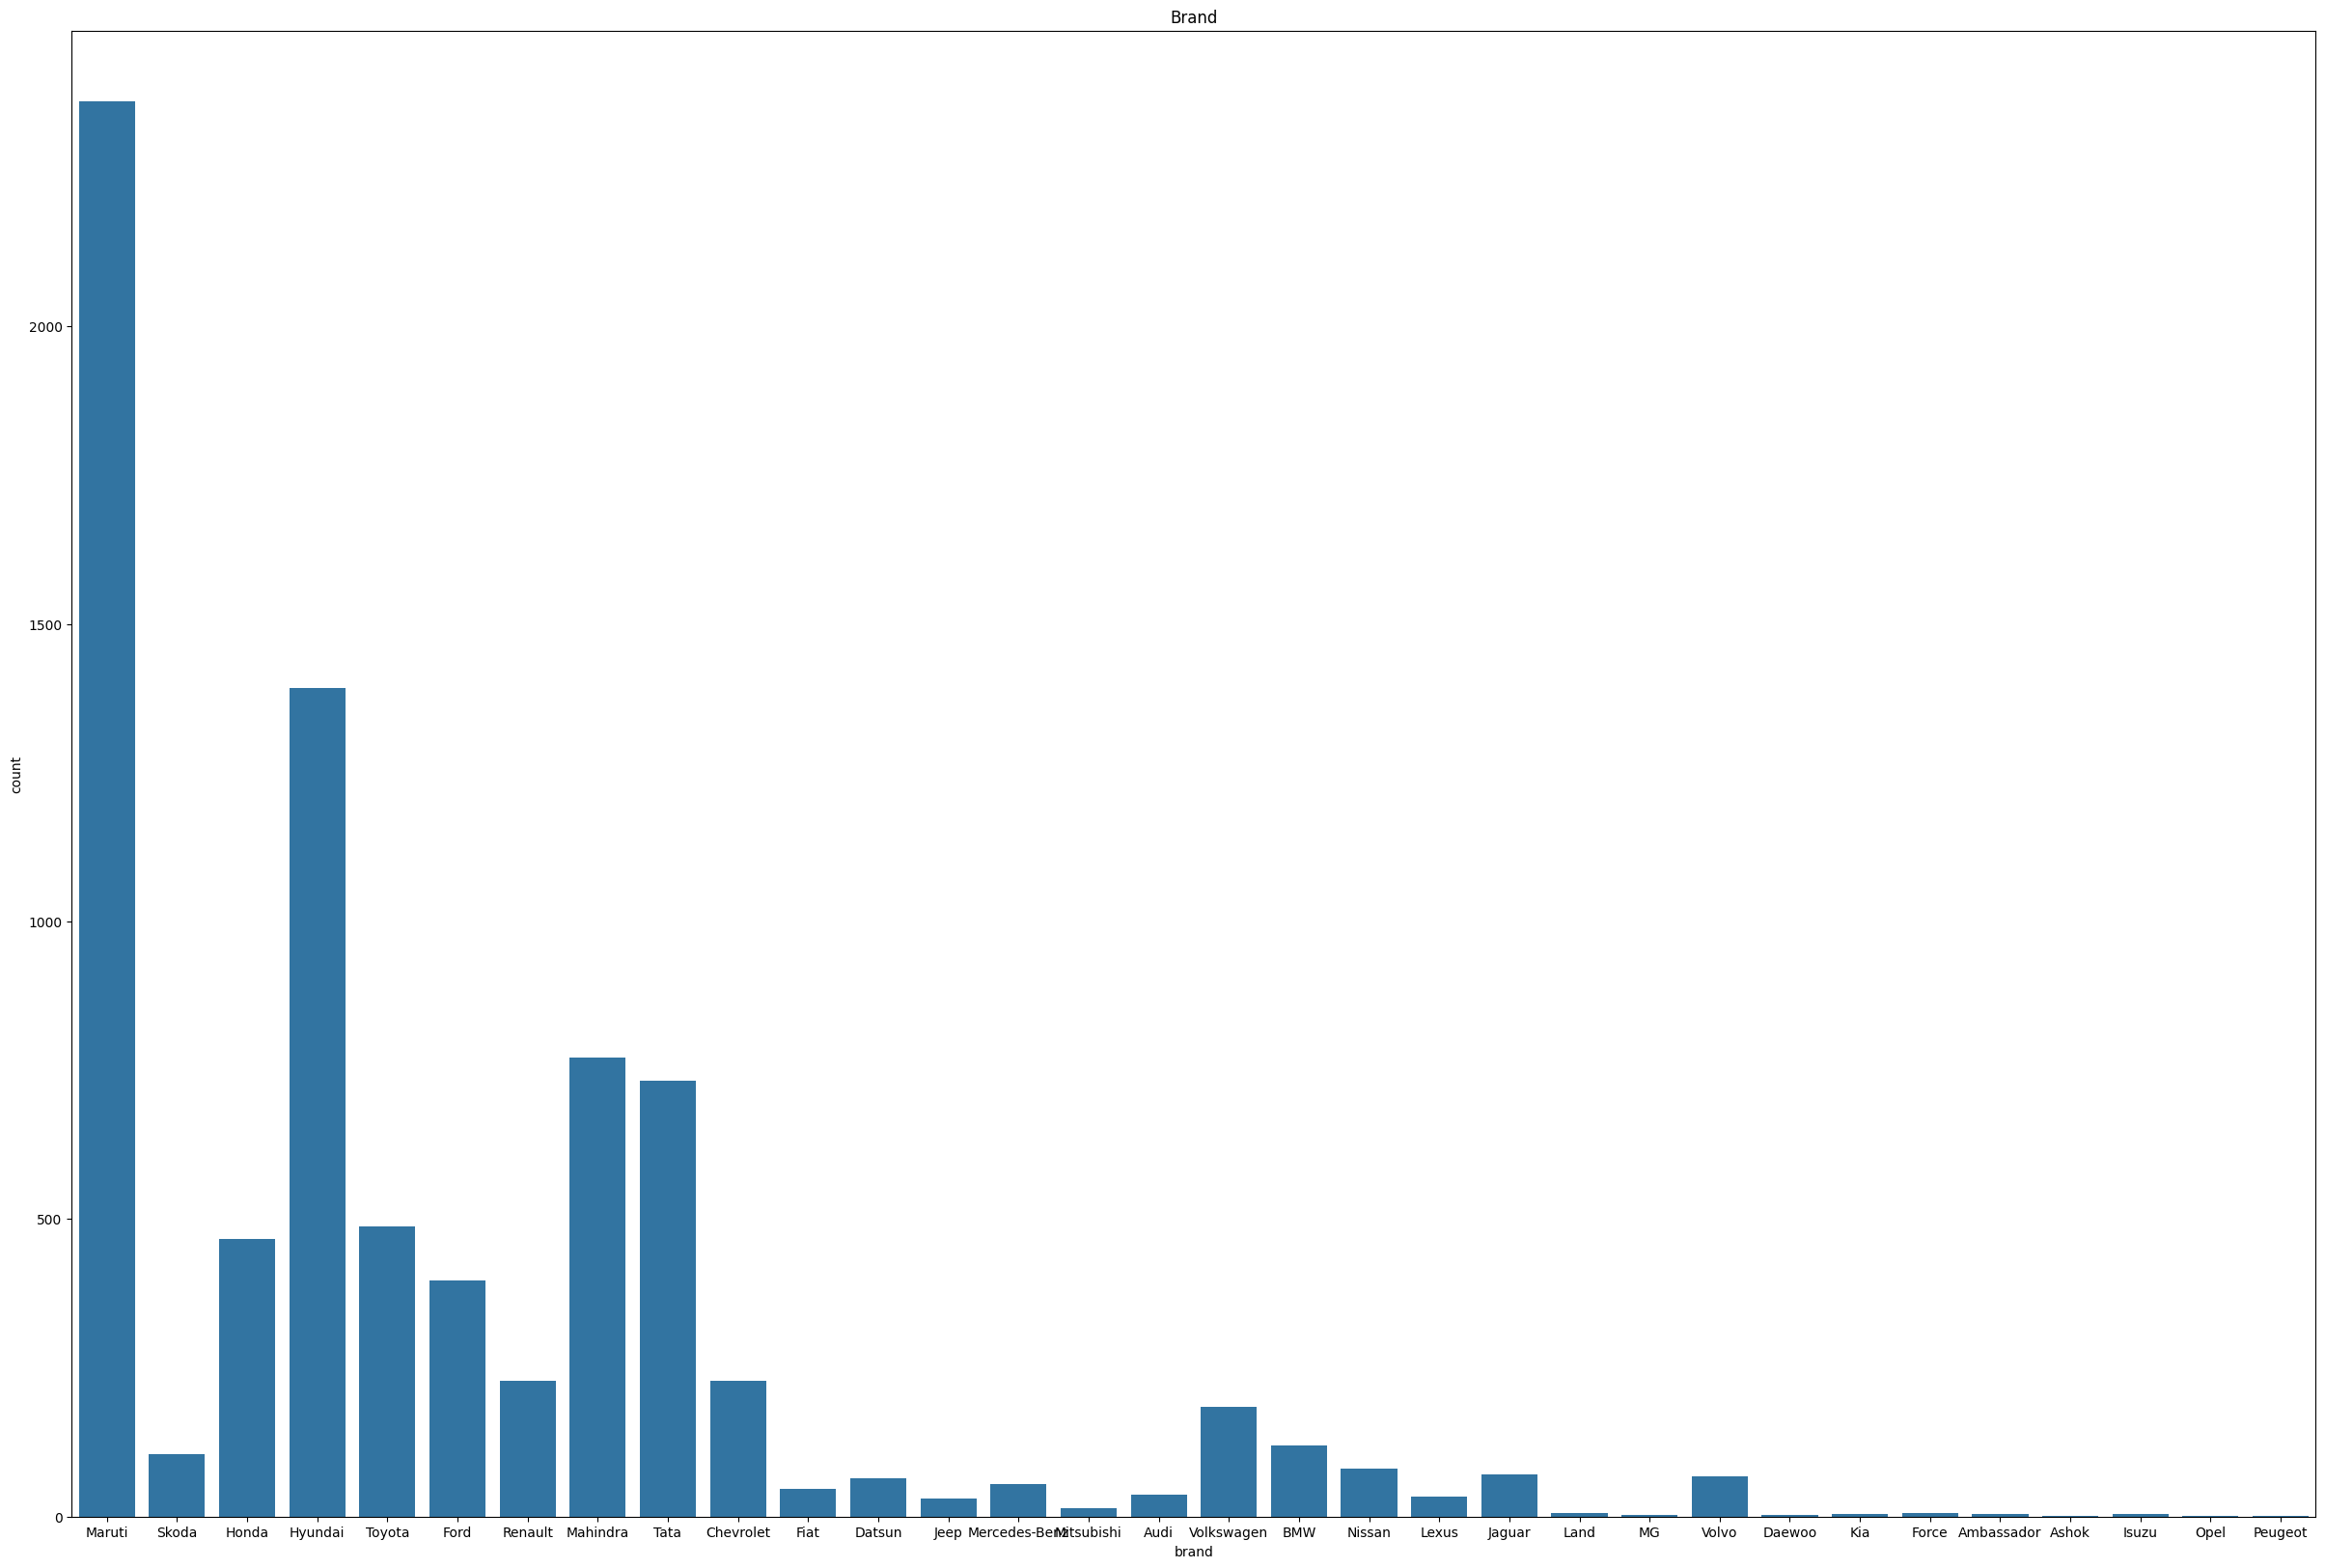

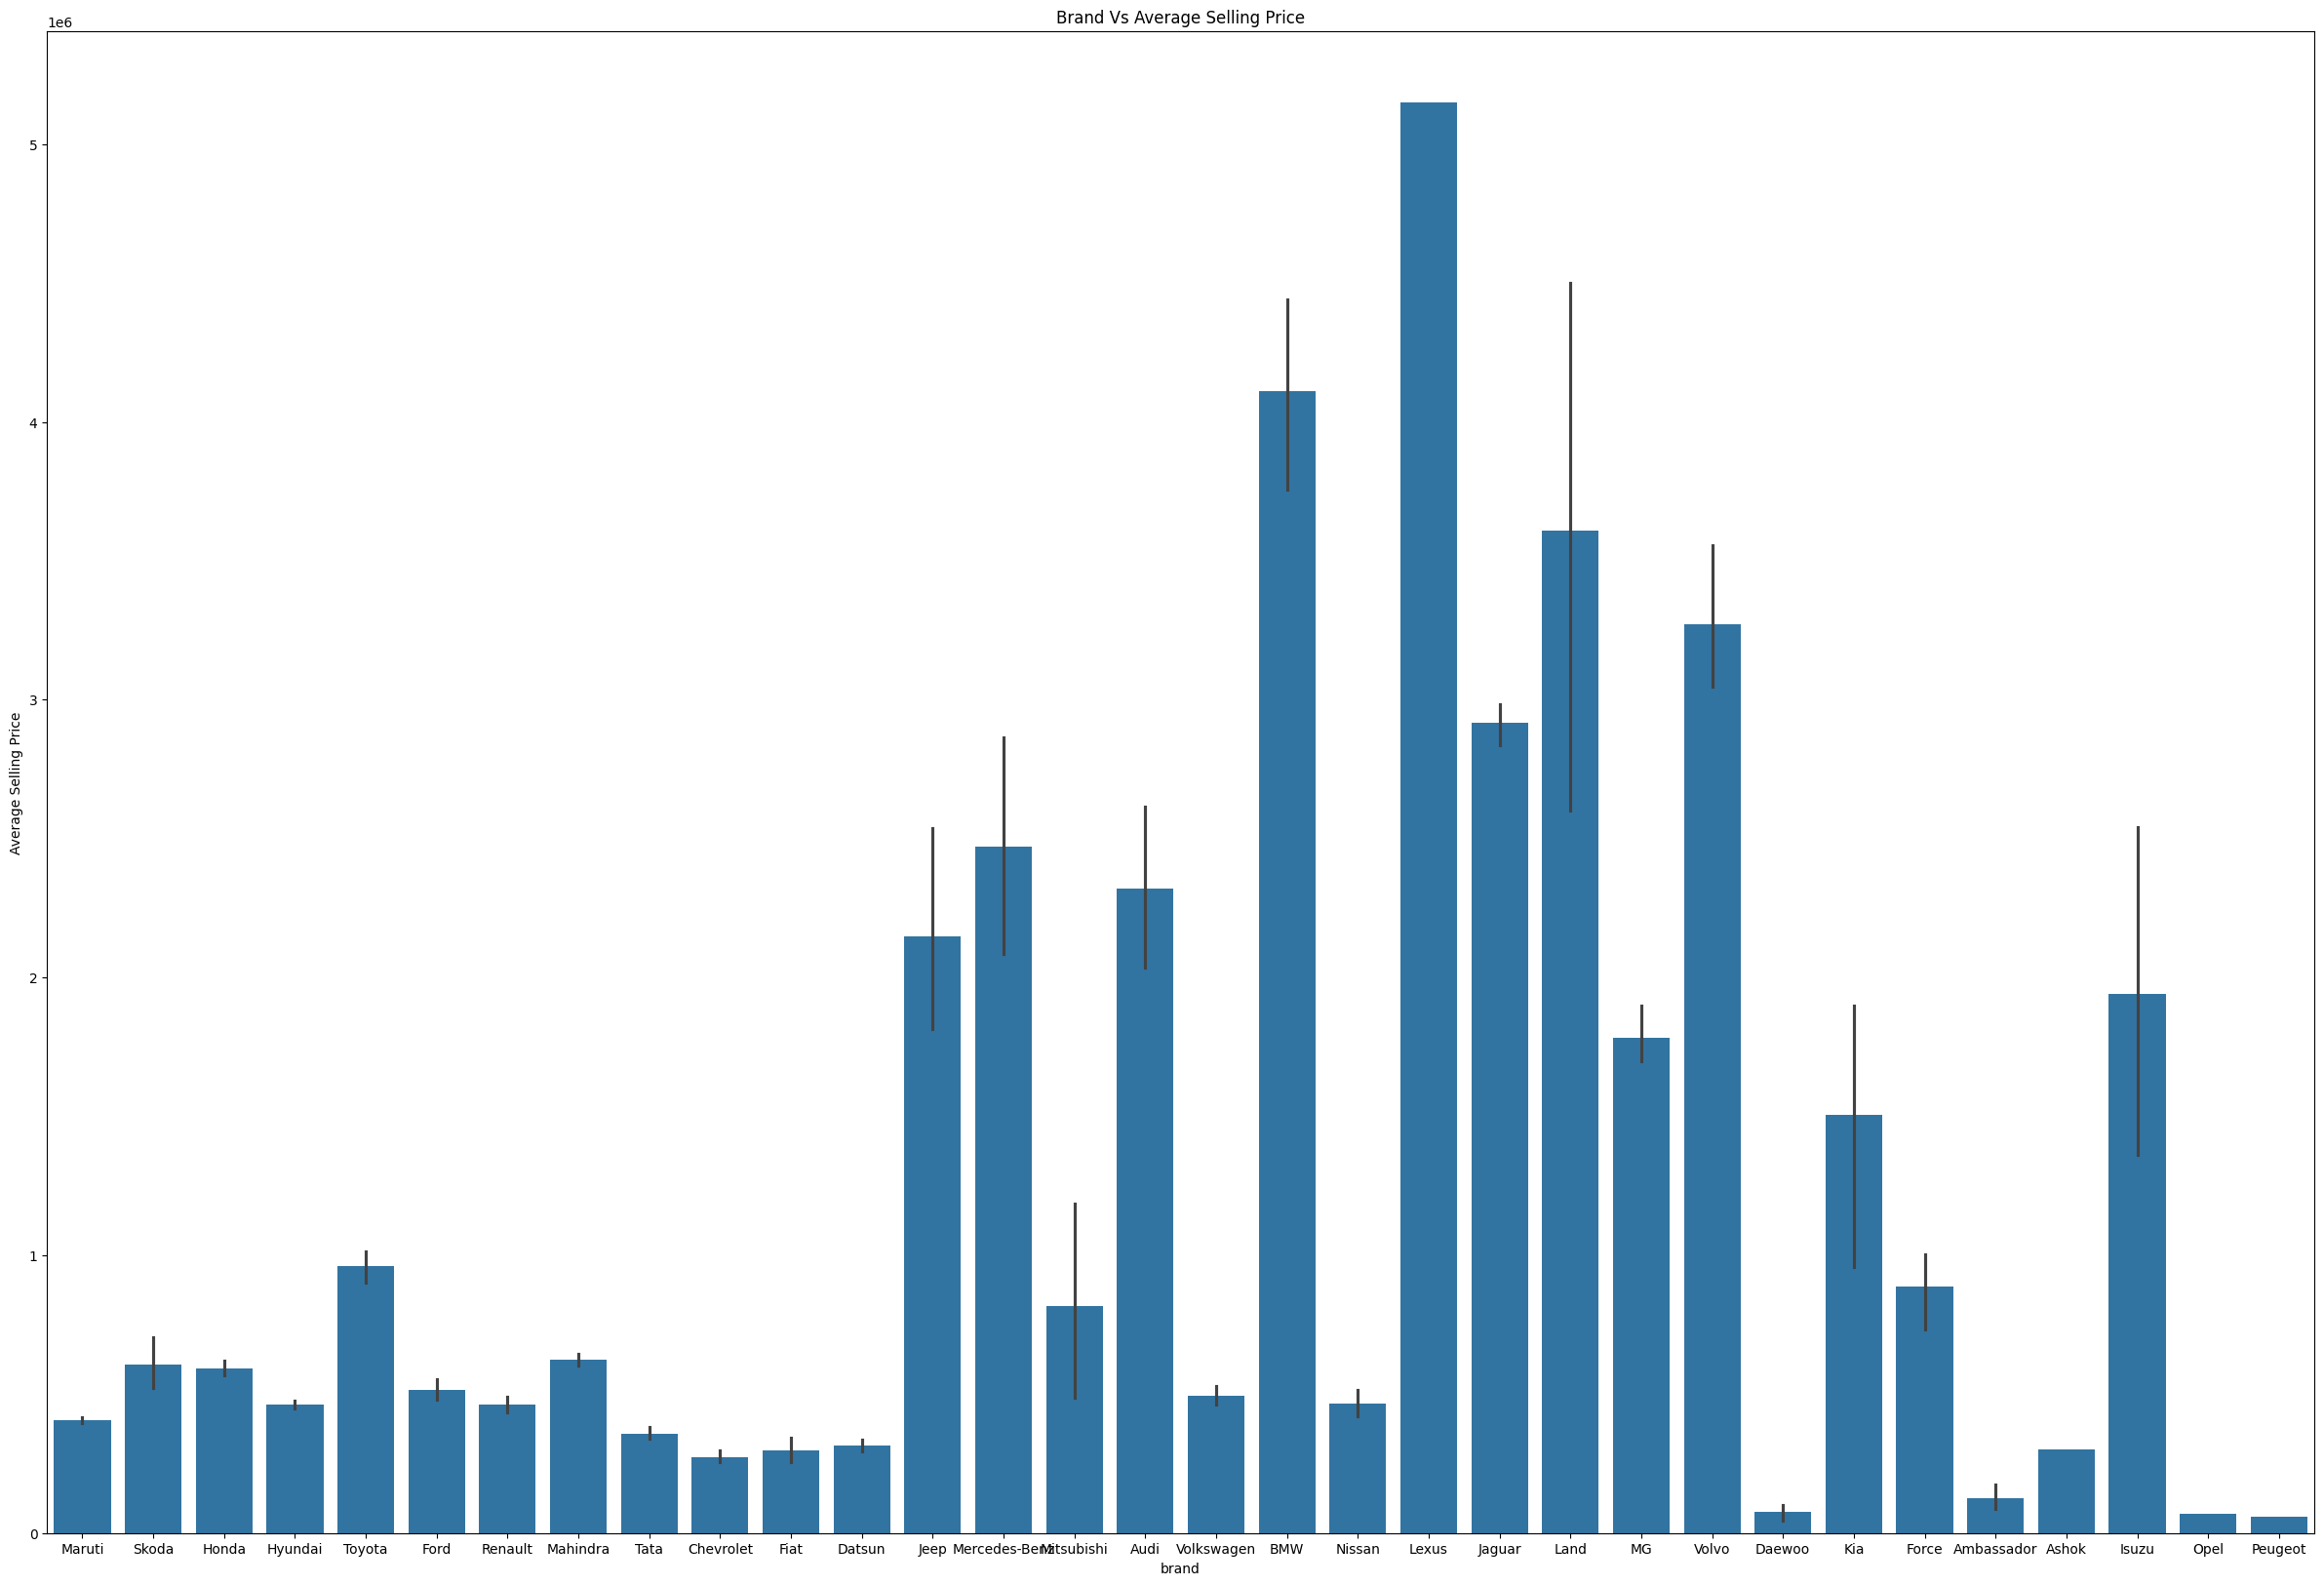

In [98]:
# Plotting the brand
plt.figure(figsize=(30,20))
plt.title('Brand')
sns.countplot(data = df, x='brand')
plt.show()

#Bar plot of brand vs average selling price
plt.figure(figsize=(30,20))
sns.barplot(x = df['brand'], y = df['selling_price'], estimator=np.average)
plt.title('Brand Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

## Feature Year

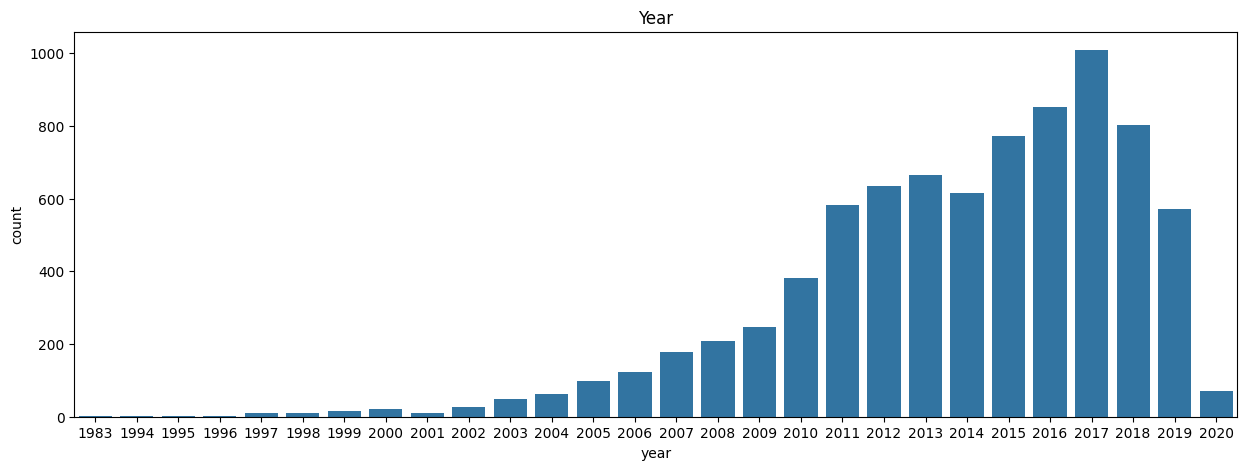

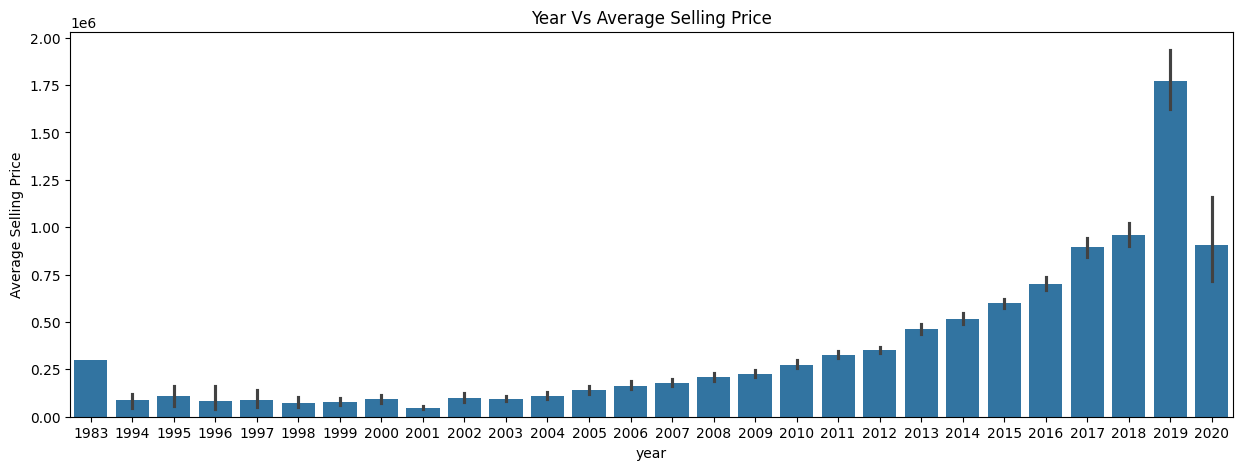

In [99]:
# Plotting the year
plt.figure(figsize=(15,5))
plt.title('Year')
sns.countplot(data = df, x='year')
plt.show()

#Bar plot of year vs average selling price
plt.figure(figsize=(15,5))
sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
plt.title('Year Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

## Feature Km Driven

Text(0.5, 1.0, 'km_driven Distribution')

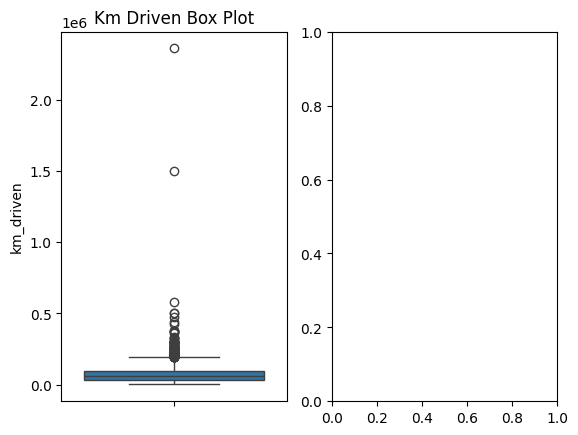

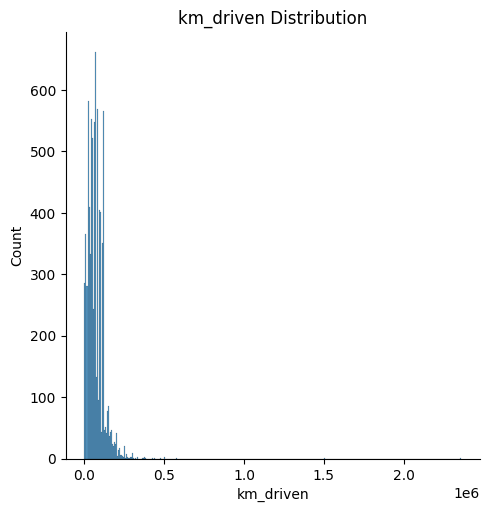

In [100]:
# Plotting the Km driven
plt.subplot(1,2,1)
sns.boxplot(df['km_driven'])
plt.title('Km Driven Box Plot')

plt.subplot(1,2,2)
sns.displot(df.km_driven)
plt.title('km_driven Distribution')

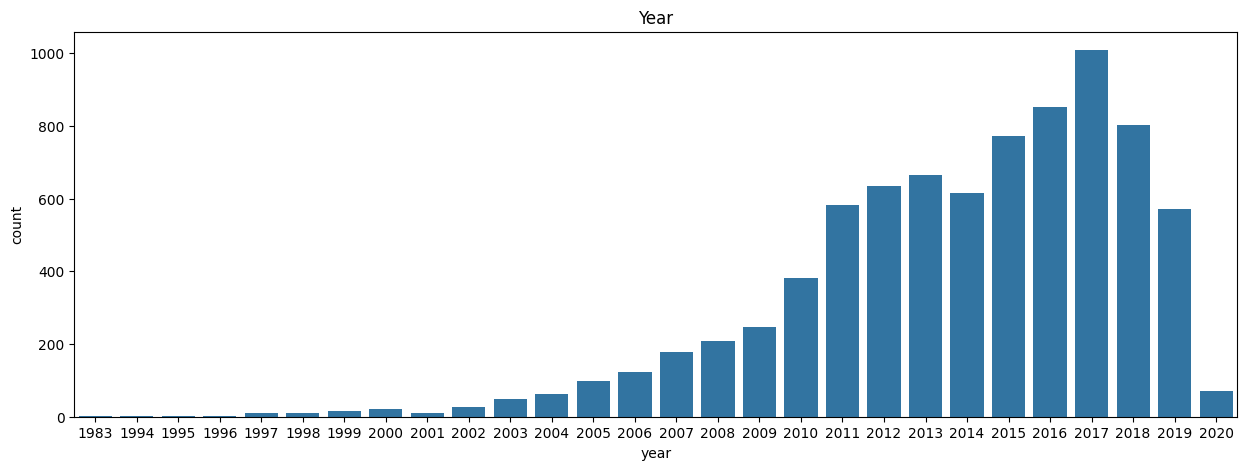

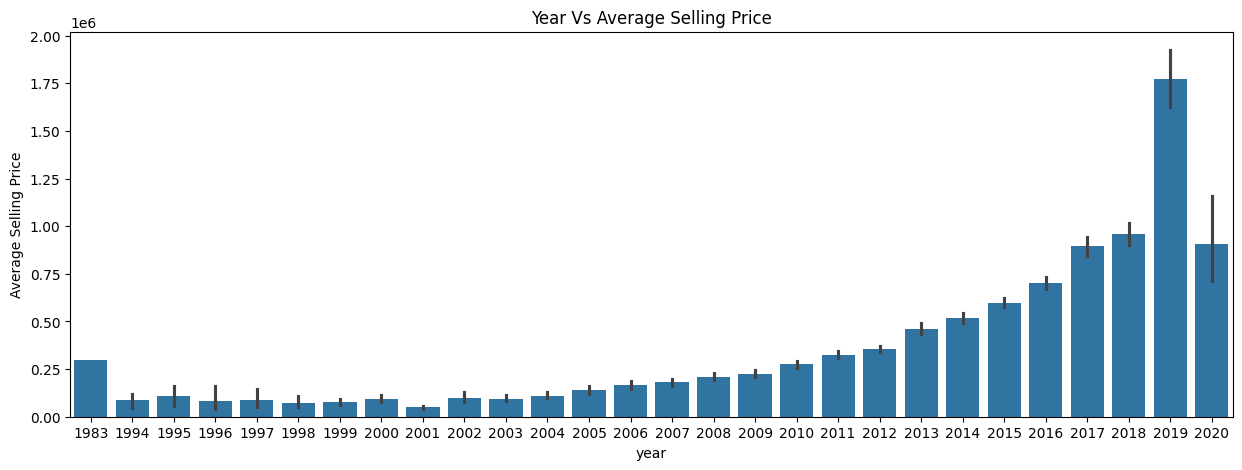

In [101]:
# Plotting the year
plt.figure(figsize=(15,5))
plt.title('Year')
sns.countplot(data = df, x='year')
plt.show()

#Bar plot of year vs average selling price
plt.figure(figsize=(15,5))
sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
plt.title('Year Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

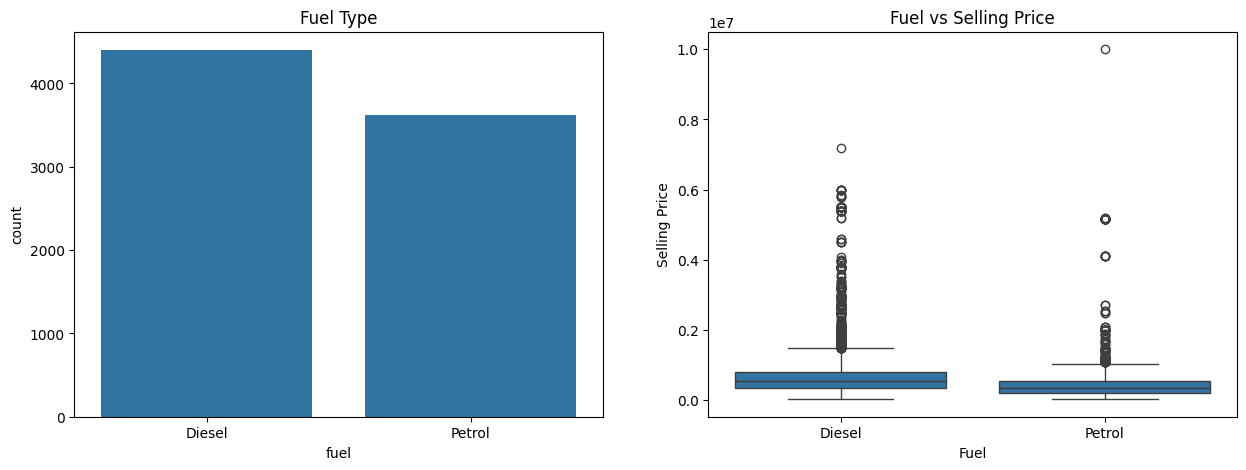

In [102]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'fuel')
plt.title('Fuel Type')

plt.subplot(1,2,2)
plt.title('Fuel vs Selling Price')
plt.xlabel('Fuel')
plt.ylabel('Selling Price')
sns.boxplot(data = df, x = 'fuel', y = 'selling_price')
plt.show()

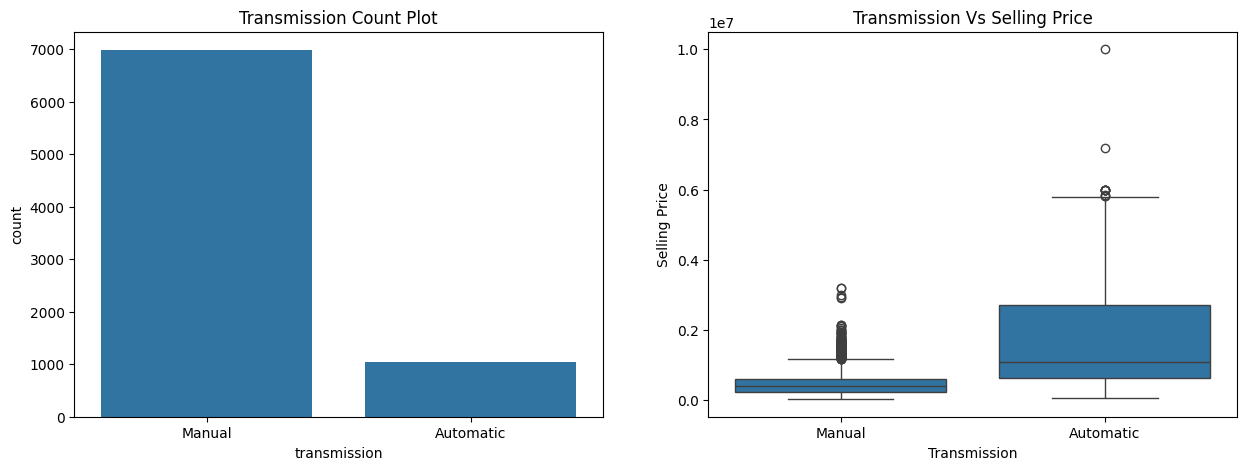

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Transmission Count Plot')
sns.countplot(data = df, x = 'transmission')

plt.subplot(1,2,2)
plt.title('Transmission Vs Selling Price')
sns.boxplot(x = df["transmission"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Transmission")
plt.show()

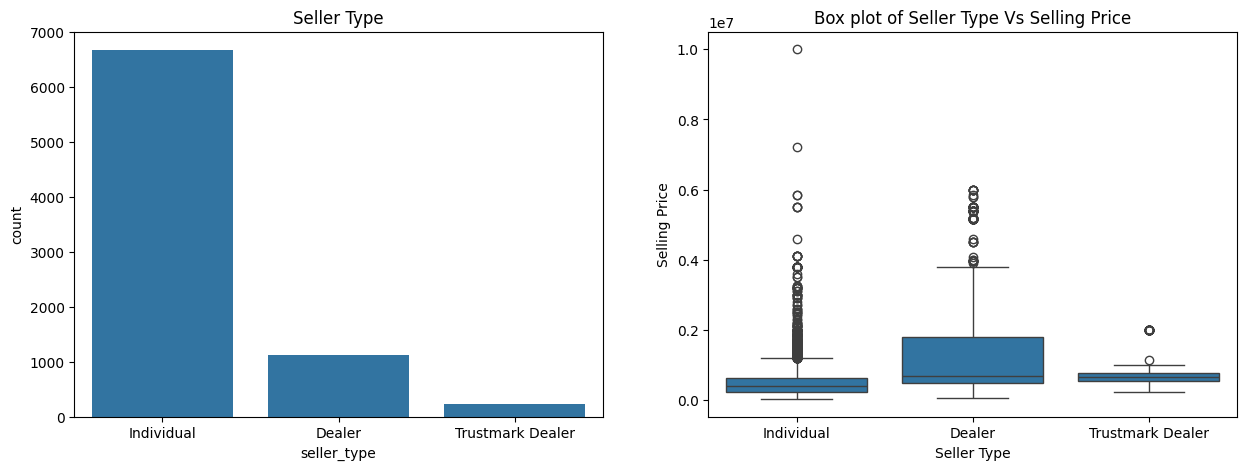

In [104]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'seller_type')
plt.title('Seller Type')

plt.subplot(1,2,2)
sns.boxplot(x = df["seller_type"], y = df["selling_price"])
plt.title('Box plot of Seller Type Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")
plt.show()

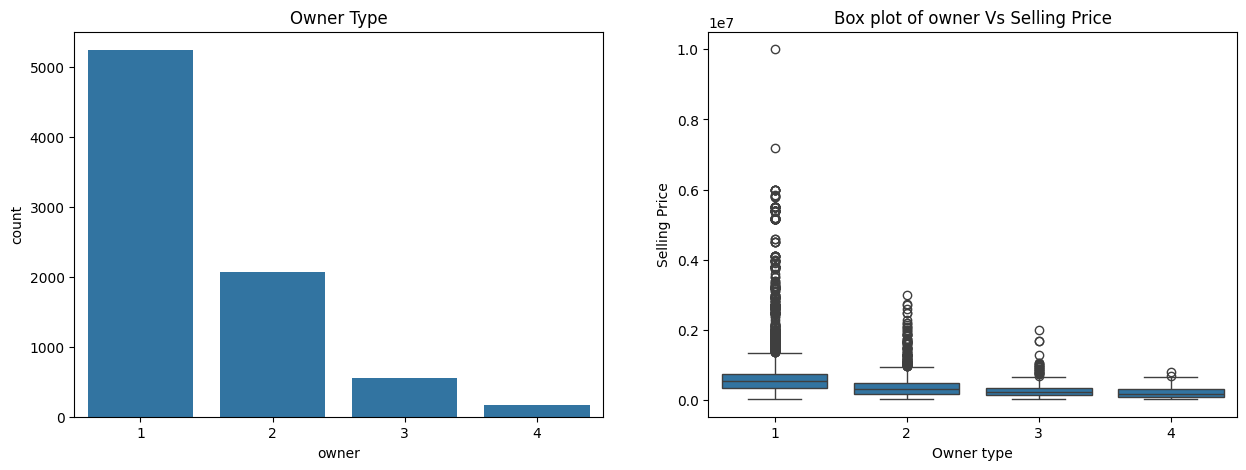

In [105]:
# Plotting the owner type
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x='owner')
plt.title('Owner Type')

# Box plot of owner type vs selling price
plt.subplot(1,2,2)
sns.boxplot(x = df["owner"], y = df["selling_price"])
plt.title('Box plot of owner Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Owner type")
plt.show()

# {'First_owner': 1,'Second_owner': 2, 'Third_owner': 3, 'Fourth_and_above_owner': 4}

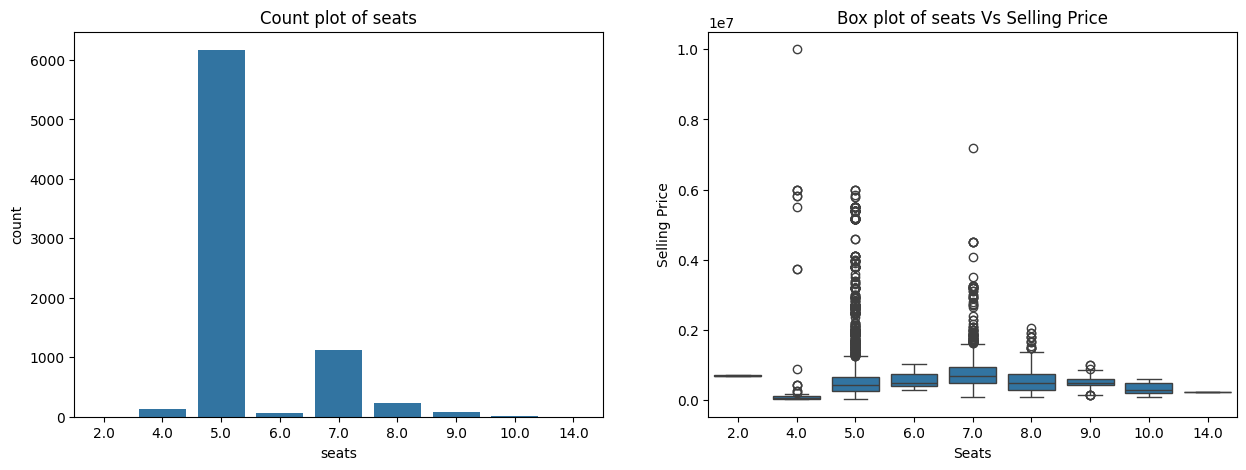

In [106]:
#Plotting the seats
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x='seats')
plt.title('Count plot of seats')

# Box plot of owner type vs selling price
plt.subplot(1,2,2)
sns.boxplot(x = df["seats"], y = df["selling_price"])
plt.title('Box plot of seats Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Seats")
plt.show()

#### Distribution plot

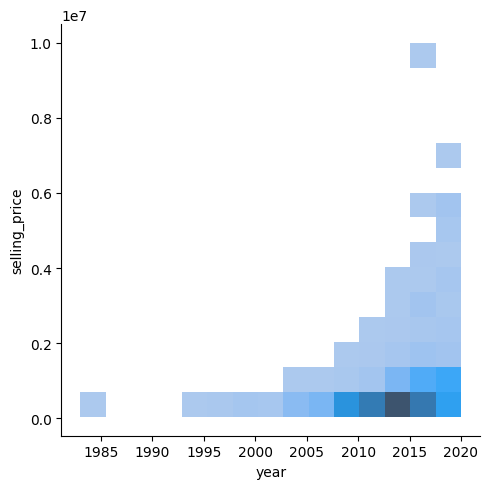

In [107]:
sns.displot(x='year', y='selling_price', data=df, bins=15)

<Axes: title={'center': 'Mileage Distribution Plot'}, xlabel='mileage', ylabel='Count'>

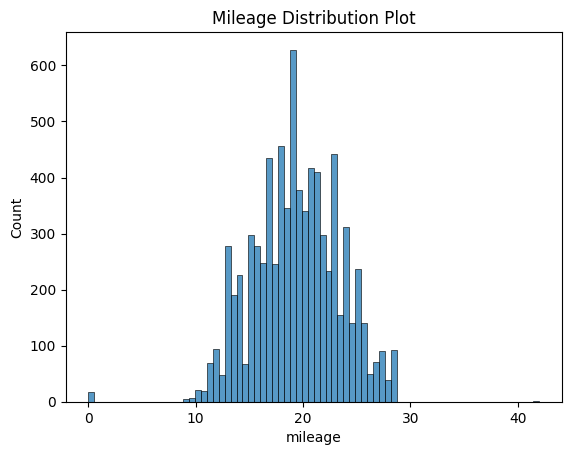

In [108]:
plt.title('Mileage Distribution Plot')
sns.histplot(df['mileage'])

<Axes: title={'center': 'Max power Dirstribution plot'}, xlabel='max_power', ylabel='Count'>

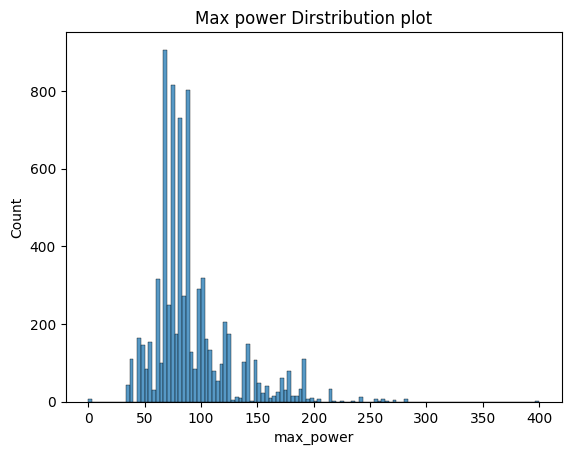

In [109]:
plt.title('Max power Dirstribution plot')
sns.histplot(df['max_power'])

<Axes: title={'center': 'engine Dirstribution plot'}, xlabel='engine', ylabel='Count'>

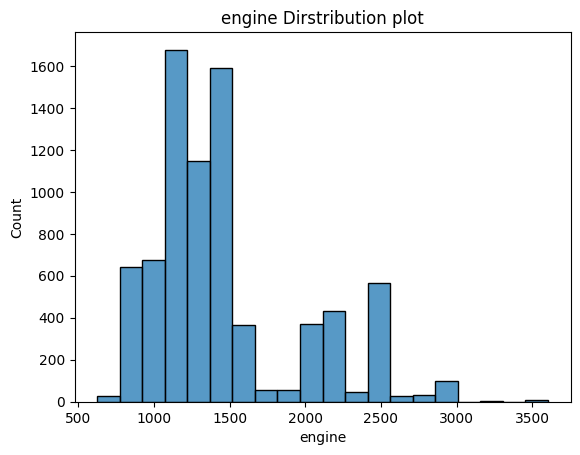

In [110]:
plt.title('engine Dirstribution plot')
sns.histplot(df['engine'],bins=20)

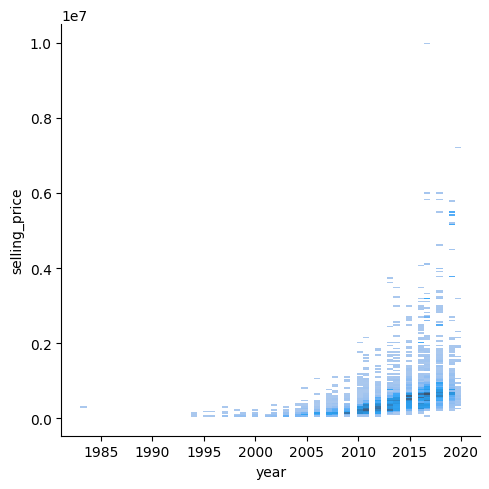

In [111]:
sns.displot(data = df, x = 'year', y='selling_price')

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the car price.  It's also for checking whether certain features are too correlated.

<Axes: >

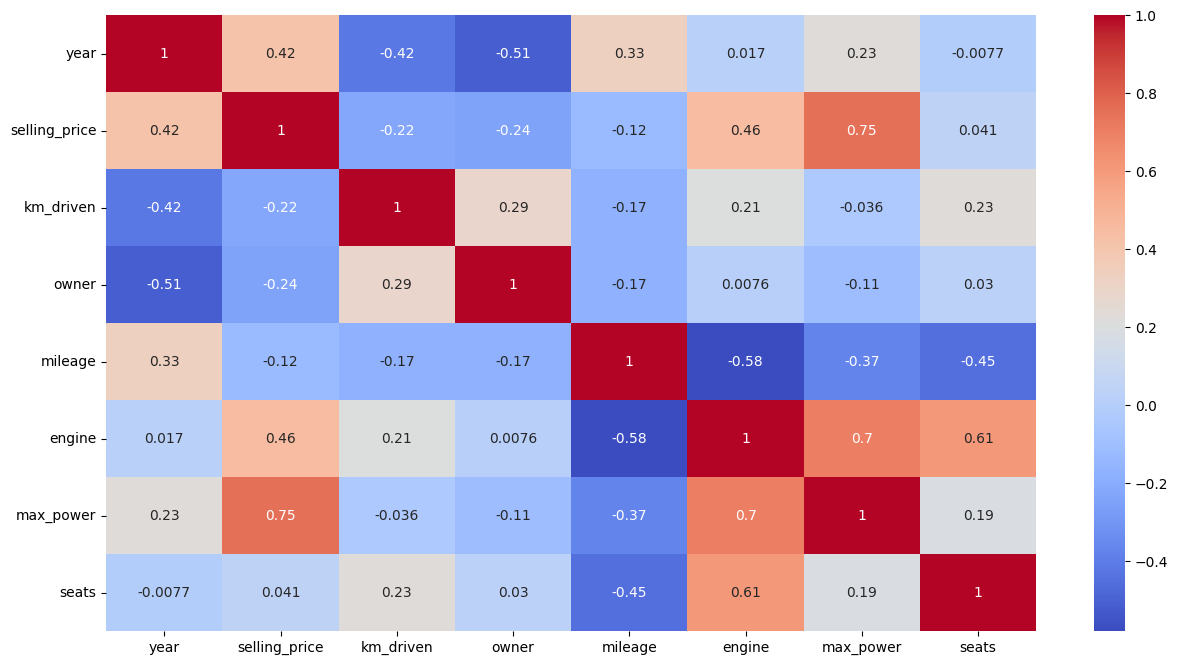

In [112]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Label encoding for fuel, transmission and seller_type



In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()

array([0, 1])

In [114]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [115]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique() 

array([1, 0])

In [116]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [117]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [118]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [119]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Verify the numeric columns
print("Numeric columns:\n", numeric_df.columns)

Numeric columns:
 Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


<Axes: >

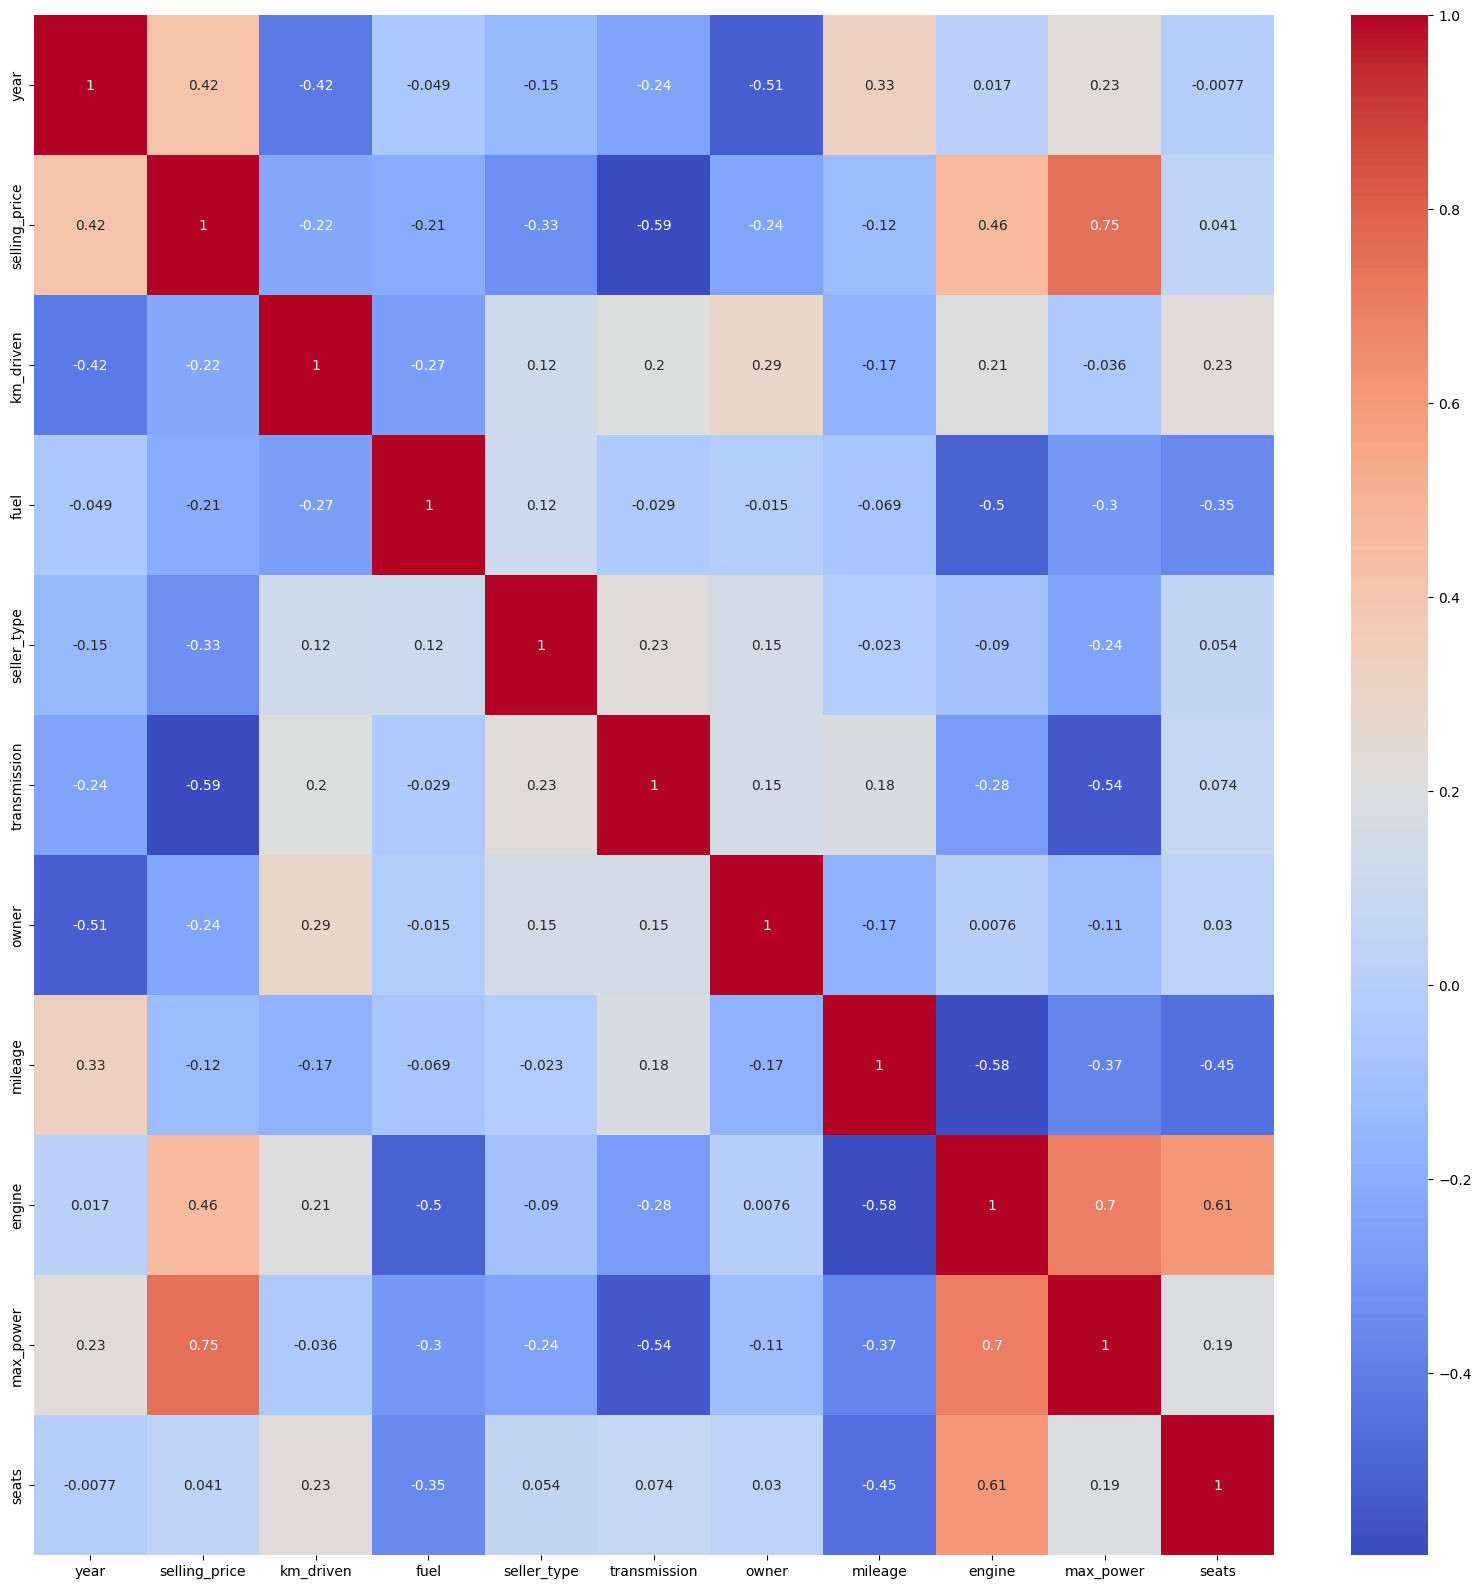

In [120]:
# Let's check out heatmap
plt.figure(figsize = (20,20))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [121]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,2013.815521,6.403937e+05,6.977314e+04,0.451794,0.890010,0.869706,1.458022,19.391962,1462.914640,91.819726,5.421551
std,4.030836,8.027015e+05,5.664419e+04,0.497702,0.395861,0.336648,0.715283,4.001972,504.759742,35.804513,0.963125
min,1983.000000,2.999900e+04,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,0.000000,1.000000,1.000000,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,0.000000,1.000000,1.000000,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,1.000000,1.000000,1.000000,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,1.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,400.000000,14.000000


In [122]:
df['max_power'].loc[df['max_power'] == 0].count()

np.int64(6)

#### Predictive Power Score


In [123]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='x', ylabel='y'>

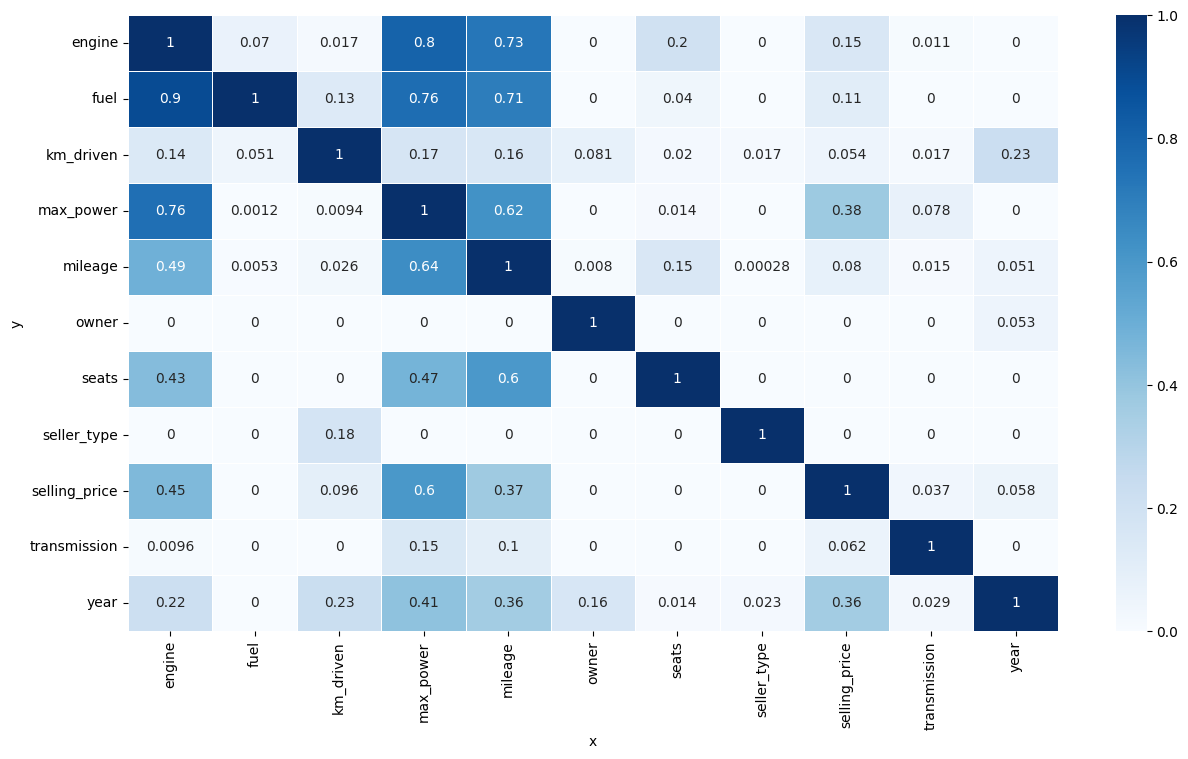

In [124]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = numeric_df.copy()
# dfcopy.head(5)

# #this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')


# #plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

<Axes: ylabel='selling_price'>

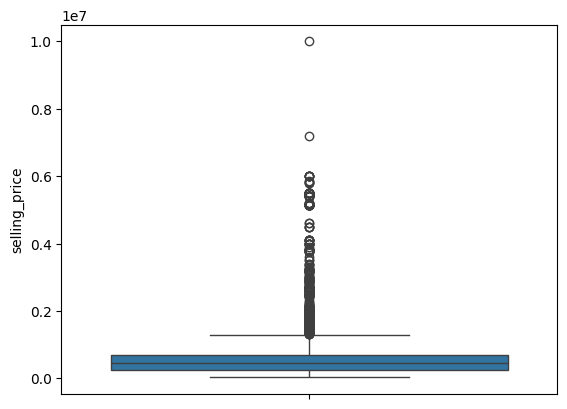

In [301]:
sns.boxplot(df['selling_price'])

## 3. Feature Engineering

I chose 4 Features. 3 Features(year,max_power,mileage) are chosen based on the ppscore and for the brand features, I assume that most of the people predict the car price based on the brand name. 


## 4. Feature selection

In [125]:
features = ['max_power','mileage','year'] 

In [126]:
features

['max_power', 'mileage', 'year']

In [127]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [128]:
X = df[features]

y = np.log(df["selling_price"])
# y = df["selling_price"]

### Train test split

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

## 5. Preprocessing

### Null values

In [130]:
#check for null values
X_train[features].isna().sum()

max_power    152
mileage      155
year           0
dtype: int64

In [131]:
X_test[features].isna().sum()

max_power    56
mileage      59
year          0
dtype: int64

In [132]:
y_train.isna().sum()

np.int64(0)

In [133]:
y_test.isna().sum()

np.int64(0)

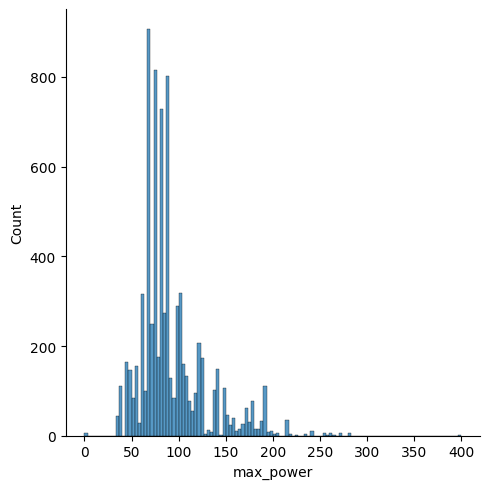

In [134]:
sns.displot(data=df, x='max_power')

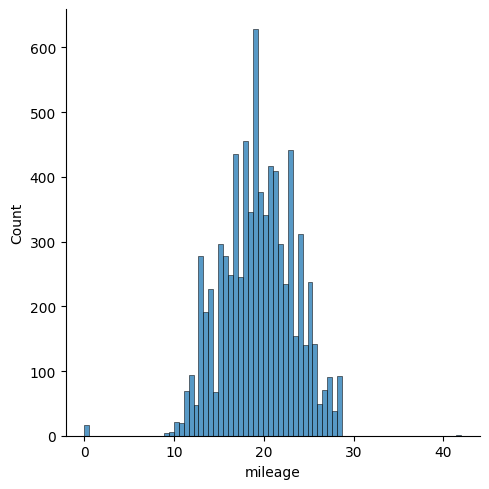

In [135]:
sns.displot(data=df, x='mileage')

In [136]:
#X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [137]:
#X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [138]:
max_power_default = X_train['max_power'].median()
mileage_default = X_train['mileage'].mean()

In [139]:
#check again
X_train[features].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [140]:
X_test[features].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [141]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

### Checking Outliers

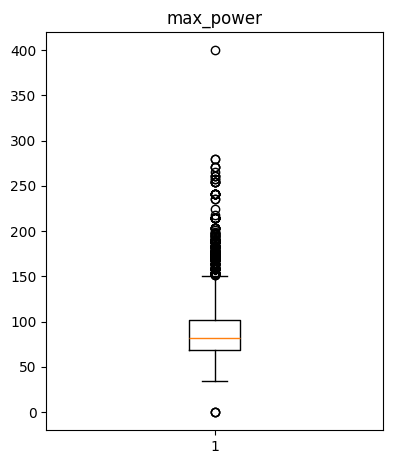

In [142]:
# Create a dictionary of columns.
#col_dict = {'engine':1,'max_power':2,'mileage':3}
col_dict = {'max_power':1}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [143]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [144]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    outlier_count(col)



---------------max_power---------------

Number of outliers: 395
Percent of data that is outlier: 7.03%

---------------mileage---------------

Number of outliers: 17
Percent of data that is outlier: 0.3%

---------------year---------------

Number of outliers: 46
Percent of data that is outlier: 0.82%


### Scaling

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scale_features = ['max_power','mileage','year']
X_train[num_scale_features] = scaler.fit_transform(X_train[num_scale_features])
X_test[num_scale_features]  = scaler.transform(X_test[num_scale_features])

In [146]:
X_train

,max_power,mileage,year
6801,-0.642479,-0.065265,-0.955836
2459,-1.560897,-0.827955,-2.964379
7083,-0.076217,-0.654500,-0.202633
2526,-0.698158,1.082595,0.048435
3586,0.217676,1.136162,1.052707
...,...,...,...
4082,0.999193,0.082681,0.801639
2974,0.763848,-0.598383,-1.206904
1343,-0.269372,-0.113731,0.299503
1590,1.793050,-0.445335,1.052707


In [147]:
X_test

,max_power,mileage,year
565,-0.189010,0.858125,1.052707
3865,-0.843383,-0.343303,-0.955836
4076,-0.269372,-0.062715,0.299503
6632,0.494063,0.455098,1.052707
3515,-1.618298,0.090334,-1.457972
...,...,...,...
4961,-0.498977,1.034130,-0.202633
7748,0.304639,-1.669719,-0.704768
5965,-1.560897,-0.827955,-3.466514
3137,-0.698445,1.082595,1.052707


In [148]:
y_train

6801    12.206073
2459    11.002100
7083    12.765688
2526    13.217674
3586    13.458836
          ...    
4082    13.997832
2974    12.765688
1343    13.049793
1590    14.269766
2809    12.429216
Name: selling_price, Length: 5619, dtype: float64

In [149]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6. Modeling

In [151]:
import mlflow
import os
import logging
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Set up MLflow tracking
mlflow.set_tracking_uri("http://localhost:5050")
os.environ["LOGNAME"] = "aike_sam"
mlflow.set_experiment(experiment_name="car-price-prediction-aike_a2")
logging.getLogger("mlflow").setLevel(logging.WARNING)

2025/02/20 02:43:40 INFO mlflow.tracking.fluent: Experiment with name 'car-price-prediction-aike_a2' does not exist. Creating a new experiment.


In [152]:
from sklearn.preprocessing import PolynomialFeatures

In [153]:
#Putting 0 for bias
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)

intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [154]:
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)

In [155]:
type(X_train)

numpy.ndarray

In [156]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [157]:
type(y_train)

numpy.ndarray

While concatenating the intercept, type of X_train and X_test changed into numpy array. Therefore, I changed y_train into numpy arrary.

In [163]:
from sklearn.model_selection import KFold
from math import sqrt
import numpy as np
#Class
class LinearRegression(object):
    kfold = KFold(n_splits=5)

    #init function
    def __init__(self, regularization, lr, method, momentum, init_theta, num_epochs=500, bs=50, cv= kfold):
    # def __init__(self, regularization, lr, method, num_epochs=500, bs=50, cv= kfold):
       self.lr = lr
       self.regularization = regularization
       self.momentum = momentum
       self.init_theta = init_theta
       self.num_epochs = num_epochs
       self.bs = bs
       self.method = method
       self.cv = cv
       self.prev_step = 0 # Initialize velocity for momentum as None; will set it later
    
    #mse
    def mse(self,ytrue,ypred):
        # MSE = (ytruee-ypred)**2.sum()/
        return ((ytrue-ypred)**2).sum()/ytrue.shape[0]
    
    #r2 score function
    def r2_score(self, ytrue, ypred):
        return 1 - ((((ypred-ytrue)**2).sum())/(((ytrue-ytrue.mean())**2).sum()))
    
    #fit Function
    def fit(self, X_train, y_train):

        #create a list of keeping kfold scores
        self.kfold_scores = []

        #variable to know our loss is not improving anymore
        # if the new loss !< old loss, then we stop the training process. (0.01 -> tolerance)
        self.val_loss_old = np.inf

        #cross validation
        for fold, (train_idx,val_idx) in enumerate(self.cv.split(X_train)):
        
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val = X_train[val_idx]
            y_cross_val = y_train[val_idx]# Cross validaiton ends here!!


            # print("X_cross_train",X_cross_train.shape, "y_cross_train",y_cross_train.shape, "X_cross_val",X_cross_val.shape, "y_cross_val",y_cross_val.shape)


            # Initializeing theta 
            # method 1: zero
            if self.init_theta =='zero':
                self.theta = np.zeros(X_cross_train.shape[1]) #initialize theta into 0

            # Xavier mthod for initialization
            if self.init_theta == 'xavier':
                
                #m = number of samples
                m = X_cross_train.shape[1]

                #calculate the range of the weights
                lower, upper = -(1.0/np.sqrt(m)),(1.0/np.sqrt(m))
                # print(lower,upper)

                numbers = np.random.uniform(lower,upper,size=m)
                scaled = lower + numbers*(upper-lower)
                self.theta = scaled
                # print(scaled)



            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                for epoch in range(self.num_epochs):

                    #Shuffle the data a little bit so that order of data doesn't affect the learning
                    perm = np.random.permutation(X_cross_train.shape[0])

                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]

                    if self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0],self.bs):
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.bs, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.bs]
                            train_loss = self._train(X_method_train,y_method_train) # train_loss is theta here.

                    elif self.method =='sto':
                        for batch_idx in range(0, X_cross_train.shape[0],1):
                            X_method_train = X_cross_train[batch_idx].reshape(1,-1)
                            y_method_train = y_cross_train[batch_idx].reshape(1, )
                            train_loss = self._train(X_method_train,y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train,y_method_train)

                    # Training error for each epoch into mlflow
                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)
                    yhat_val = self.predict(X_cross_val)

                    # Validation loss for each epoch into mlflow
                    val_loss_new = self.mse(y_cross_val,yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)

                    # r2 score for each epoch into mlflow
                    val_r2 = self.r2_score(y_cross_val,yhat_val)
                    mlflow.log_metric(key="val_r2", value=val_r2, step=epoch)

                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        print(f"Early Stopping at Epoch {epoch}")
                        break

                    self.val_loss_old = val_loss_new

                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: MSE: {val_loss_new}")
                print(f"Fold {fold}:R2: {val_r2}")


    #train
    def _train(self,X,y):
        #1. predict
        yhat = self.predict(X)

        #2. calculate the grad
        grad = (1/X.shape[0]) * X.T @ (yhat - y) 
        if self.regularization:
            grad += self.regularization.derivation(self.theta)

        self.update(grad)
        
        return self.mse(y,yhat)
    
    def update(self,grad):
        step = self.lr * grad
        self.theta = self.theta - step + self.momentum * self.prev_step
        self.prev_step = step
        return

    # predict
    def predict(self,X):
        #shape of return value(predicted value) -> (m,n) @ (n,) =(m,)
        return X @ self.theta  # @ is matrix multiplication

    # get theta
    def _coef(self):
        return self.theta[1:]
    
    # get intercept or bias
    def _intercept(self):
        return self.theta[0]
    
    # Feature Importance 
    def feature_importance(self):
        feature_importance = model._coef()
        sorted_idx = feature_importance.argsort()
        plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
        plt.xlabel("Feature Importance")



##  Testing

In [164]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class NormalPenalty:

    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return 0
        
    def derivation(self, theta):
        return 0
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio=0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
    #  def __init__(self, regularization, lr, method, momentum, init_theta, mlflow_params, num_epochs=500, bs=50, cv= kfold):
class Lasso(LinearRegression):
    
    def __init__(self, lr, method, momentum, init_theta, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method,momentum, init_theta)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, momentum, init_theta,l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, momentum, init_theta)

class Normal(LinearRegression):
    
    def __init__(self, method, lr, momentum, init_theta,l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, lr, method, momentum, init_theta,)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, momentum, init_theta, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method,momentum, init_theta)


In [165]:
type(X_train)

numpy.ndarray

## Experiment

In [166]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [167]:
poly_degrees = [True,False]
regs = ["Normal", "ElasticNet","Ridge", "Lasso"]
lrs = [0.01, 0.001, 0.0001]
momentums = [0,0.5] # momentum should be between 0 and 1. 
init_thetas = ['zero','xavier']
methods = ['batch','mini','sto']

for poly_degree in poly_degrees:
    for reg in regs:
        for momentum in momentums:
            for method in methods:
                for init_theta in init_thetas:
                    for lr in lrs:
                        


                            params = { 
                                    "momentum": momentum,
                                    "method": method, 
                                    "init_theta": init_theta,
                                    "lr": lr, 
                                    "l" :0.1
                                    }
               
                            
                            mlflow.start_run(run_name=f"poly_degree:{poly_degree}-reg-{reg}-momentum-{params['momentum']}-method-{params['method']}-theta-{params['init_theta']}-lr-{params['lr']}", nested=True)
                            ## log the parameters
                            mlflow.log_params(params=params)
                            print("="*5, reg, "="*5)

                            # #######
                            type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                            model = type_of_regression(**params)  

                            #Polynominal Loop
                            if poly_degree == True:
                                poly = PolynomialFeatures(degree=1, include_bias=False)
                                X_train_poly = poly.fit_transform(X_train)
                                X_test_poly = poly.transform(X_test)
                            else:
                                 X_train_poly, X_test_poly = X_train, X_test

                            model.fit(X_train_poly, y_train)
                

                            #for train data
                            yhat = model.predict(X_train_poly)
                            train_mse  = model.mse(yhat, y_train)
                            train_r2 = model.r2_score(yhat, y_train)

                            print("Train MSE: ", train_mse)
                            mlflow.log_metric(key="train_mse", value=train_mse)

                            print("Train R2: ", train_r2)
                            mlflow.log_metric(key="train_r2", value=train_r2)

                            signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                            mlflow.end_run()

===== Normal =====
Fold 0: MSE: 0.1241683777279367
Fold 0:R2: 0.8217759398066962
🏃 View run Fold-0 at: http://localhost:5050/#/experiments/537158392617212200/runs/8527347587c14d429b39519e0b5cfe8f
🧪 View experiment at: http://localhost:5050/#/experiments/537158392617212200
Fold 1: MSE: 0.11934822437061847
Fold 1:R2: 0.8253348075815029
🏃 View run Fold-1 at: http://localhost:5050/#/experiments/537158392617212200/runs/71be88b5bf5d4fc3b346211dd13a8e6b
🧪 View experiment at: http://localhost:5050/#/experiments/537158392617212200
Fold 2: MSE: 0.11181668544640676
Fold 2:R2: 0.8280230747165932
🏃 View run Fold-2 at: http://localhost:5050/#/experiments/537158392617212200/runs/7f15947f9b4047d58a6c334730eb87e6
🧪 View experiment at: http://localhost:5050/#/experiments/537158392617212200
Fold 3: MSE: 0.128205475125154
Fold 3:R2: 0.8175967534587464
🏃 View run Fold-3 at: http://localhost:5050/#/experiments/537158392617212200/runs/a346f7585c4b40d49082be3ee9945ba5
🧪 View experiment at: http://localhost:50

### Testing the best model on the test dataset

I chose the best model by comparing the result of r2 score and Mse score in ML Flow. 
I will retrain the model using the best parameters.

In [342]:
import math
poly_degrees = [False]
regs = ["Normal"]
lrs = [0.0001]
momentums = [0] # momentum should be between 0 and 1. 
init_thetas = ['xavier']
methods = ['sto']

for poly_degree in poly_degrees:
    for reg in regs:
        for momentum in momentums:
            for method in methods:
                for init_theta in init_thetas:
                    for lr in lrs:
                        
                        params = {"method": method, "lr": lr, "l": lr, "momentum": momentum, "init_theta": init_theta}
                        
                        current_run = f"polynomial-{poly_degree}-reg-{reg}-momemtum{momentum}-method-{method}-theta-{init_theta}-lr-{lr}"

                        print("="*5, current_run, "="*5)

                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)  

                        #Polynominal Loop
                        if poly_degree == True:
                            poly = PolynomialFeatures(degree=1, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)
                        else:
                                X_train_poly, X_test_poly = X_train, X_test

                        model.fit(X_train_poly, y_train)
            

                        #for train data
                        yhat = model.predict(X_train_poly)
                        train_mse  = model.mse(yhat, y_train)
                        print("Train MSE: ", train_mse)

                        train_r2 = model.r2_score(yhat, y_train)
                        print("Train R2: ", train_r2)
                       

===== polynomial-False-reg-Normal-momemtum0-method-sto-theta-xavier-lr-0.0001 =====


2024/09/04 12:34:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a4555cf7ed014288b37fcc95965459f8.
2024/09/04 12:34:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 396
Fold 0: MSE: 0.09510998496499729
Fold 0:R2: 0.8634846649722144


2024/09/04 12:35:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4849e2f85e874193b98dc37bc52ed8f0.
2024/09/04 12:35:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.09285653075153542
Fold 1:R2: 0.8641051938848633


2024/09/04 12:35:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c694ad7efc86456082dd82202a164701.
2024/09/04 12:35:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 428
Fold 2: MSE: 0.08061963429236861
Fold 2:R2: 0.8760049381921667


2024/09/04 12:36:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6c45ea4e481148c0819a316aa1f6c910.
2024/09/04 12:36:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 394
Fold 3: MSE: 0.09785991852581047
Fold 3:R2: 0.8607706353574581


2024/09/04 12:36:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/28ed069aa3a04d32a8a463ad9ec73987.
2024/09/04 12:36:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 446
Fold 4: MSE: 0.08027054056293817
Fold 4:R2: 0.8809180207116649
Train MSE:  0.08702491924118633
Train R2:  0.8540728918055684


In [343]:
yhat = model.predict(X_test)

In [344]:
test_mse = model.mse(yhat,y_test)
print("Test MSE: ", test_mse)

Test MSE:  0.09715030250004458


In [345]:
test_r2 = model.r2_score(yhat, y_test)
print("Test r2 score: ",test_r2)

Test r2 score:  0.8505204104309951


In [346]:
 #for test data
                            


# yhat = model.predict(X_test_poly)
# test_mse  = model.mse(yhat, y_test)
# test_r2 = model.r2_score(yhat, y_test)

# print("Test MSE: ", test_mse)
# print("Test R2: ", test_r2)
                                                        

In [360]:
X_train.shape

(5619, 35)

In [347]:
X_train[0]

array([ 1.        , -0.95583608, -0.64247931, -0.0652653 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ])

## 8. Analysis:  Feature Importance

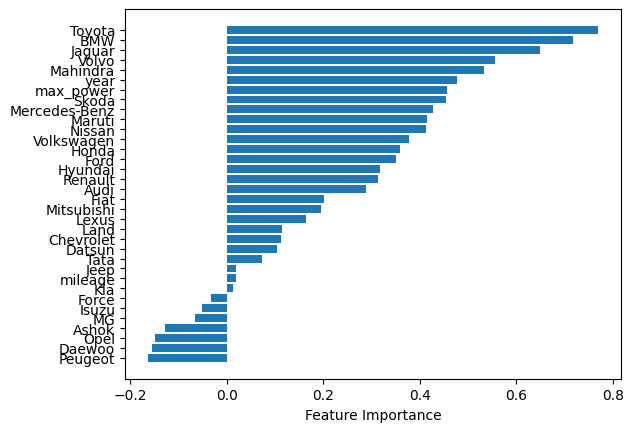

In [348]:
#Feature Importance function from Linear Regression Class
model.feature_importance()

### Saving the model
To provide inference service or deploy, it's best to save the model for latter use.

In [349]:
import pickle
model = {
    'model': model,
    'scaler': scaler,
    'year_default' : 2017,
    'max_power_default' : max_power_default,
    'mileage_default' : mileage_default,
    'brand_ohe' : brand_ohe
}

# save the model to disk
filename = 'car_price_predicition2.model'
pickle.dump(model, open(filename, 'wb'))

## 9. Inference

In [350]:
# load the model from disk
loaded_file = pickle.load(open(filename, 'rb'))

In [351]:
loaded_model = loaded_file['model']
loaded_scaler = loaded_file['scaler']
brand_ohe = loaded_file['brand_ohe']

In [375]:
sample = df [['brand','year','max_power','mileage']].loc[2000]
sample

brand        Chevrolet
year              2014
max_power         82.4
mileage           18.2
Name: 2000, dtype: object

In [374]:
type(brand_ohe)

sklearn.preprocessing._encoders.OneHotEncoder

In [353]:
brand_ohe.categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object)]

In [379]:
sample_np = np.array([[2014, 82.4, 18.2]])
sample_np

array([[2014. ,   82.4,   18.2]])

In [388]:
# Assuming you have already fitted brand_ohe on your training data
sample_brand_ohe = list(brand_ohe.transform([['Chevrolet']]).toarray()[0])

# Combine the one-hot encoded brand with the other features
sample= np.array([[2014,82.4,18.2]+sample_brand_ohe])

# Now scale the combined sample
sample[:,0:3] = loaded_scaler.transform(sample[:,0:3])
sample = np.insert(sample, 0, 1, axis=1)
sample

array([[ 1.        ,  0.04843522, -0.25789182, -0.29228659,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [389]:
sample.shape

(1, 35)

In [390]:
df['selling_price'].loc[2000]

300000

In [391]:
predicted_price = loaded_model.predict(sample)
predicted_price= np.exp(predicted_price)
predicted_price

array([297815.49585356])

# **Assignment Report**